# Red Wine Quality 

Using the K Nearest Neighbours (KNN) algorithm to make a prediction on the quality of red wine.

## Import Libraries

In [138]:
#import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans 
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print('Libraries imported!')

Libraries imported!


## Read Datasets

In [139]:
#read dataset
pd.set_option('display.max_columns', None)
df_wine = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv', delimiter=',')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [140]:
#make a copy of the dataset so we still have the original data in case we make any changes to the other data

df_wine_original= df_wine.copy()

## Data Exploration

In [141]:
#view the shape of the train data
df_wine.shape

(1599, 12)

In [142]:
#check the data types of each column
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [143]:
#obtain a statistical summary of the dataframe
pd.set_option('display.max_columns', None)
df_wine.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Bivariate analysis

### Dependent Variable

In [144]:
#Let’s see how many unique quality is in our target variable
df_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

681 with quality of 5, 638 with quality of 6, 199 with quality of 7, 53 with quality of 4, 18 with quality of 8 and 10 with quality of 3

In [145]:
#let's normalize the value counts to True, so we'll see proportions instead of numbers

df_wine['quality'].value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

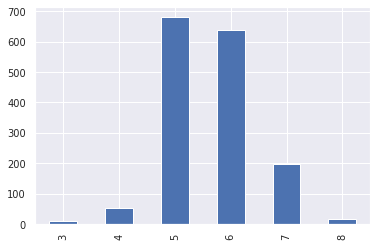

In [146]:
df_wine['quality'].value_counts().plot.bar()
plt.show()

### Independent Variables

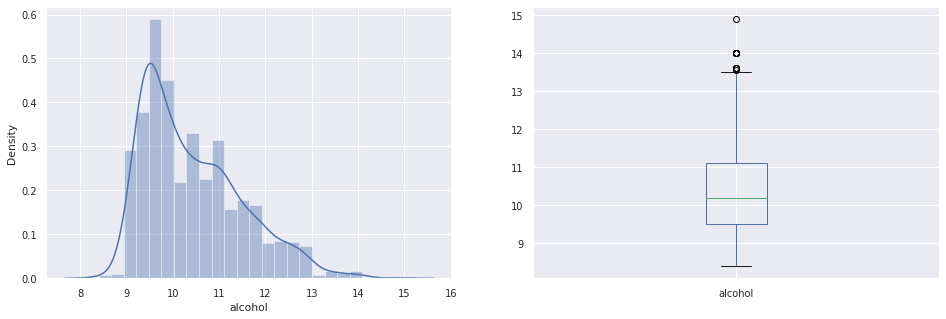

In [147]:
#visualize the variables, starting with alcohol

plt.figure(1) 
plt.subplot(121)
sns.distplot(df_wine['alcohol'])

plt.subplot(122)
df_wine['alcohol'].plot.box(figsize=(16,5))

plt.show()

the distribution is fairly norrmal, but skewed to the right

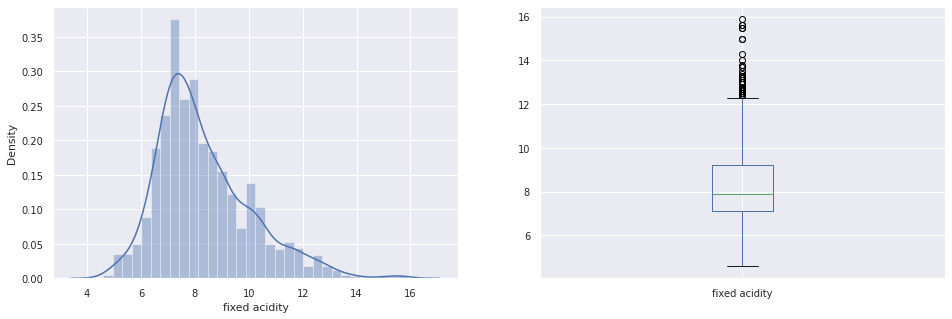

In [148]:
#fixed acidity

plt.figure(1) 
plt.subplot(121)
sns.distplot(df_wine['fixed acidity'])

plt.subplot(122)
df_wine['fixed acidity'].plot.box(figsize=(16,5))

plt.show()

the distribution is fairly norrmal, and there are few outliers

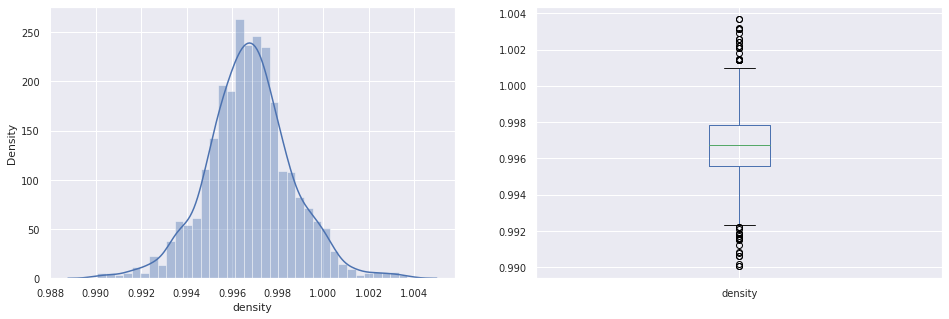

In [149]:
#density

plt.figure(1) 
plt.subplot(121)
sns.distplot(df_wine['density'])

plt.subplot(122)
df_wine['density'].plot.box(figsize=(16,5))

plt.show()

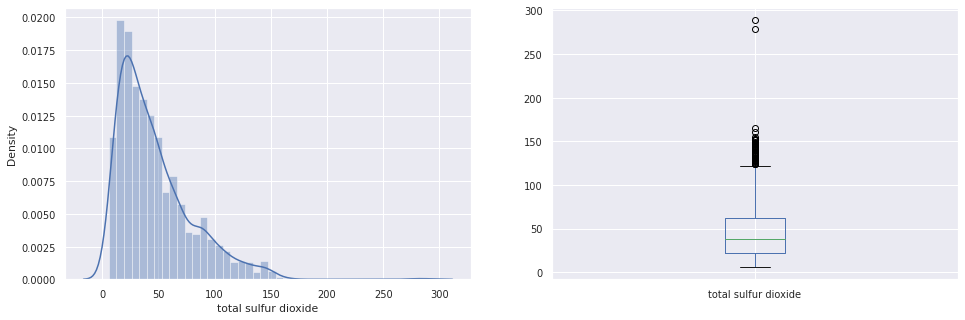

In [150]:
#total sulfur dioxide

plt.figure(1) 
plt.subplot(121)
sns.distplot(df_wine['total sulfur dioxide'])

plt.subplot(122)
df_wine['total sulfur dioxide'].plot.box(figsize=(16,5))

plt.show()

The distribution is skewed to the right and there are lots of outliers

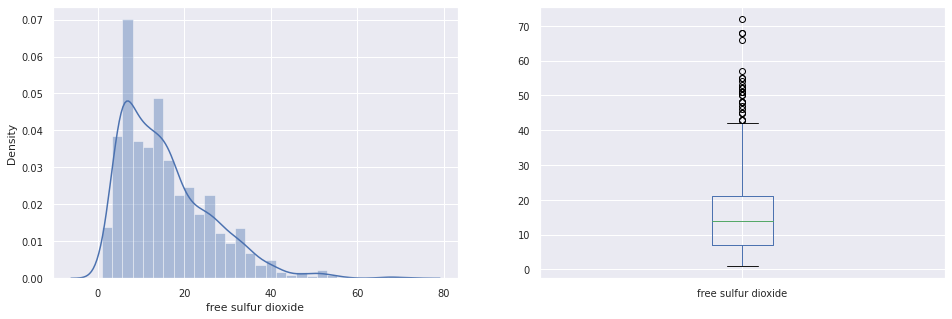

In [151]:
#free sulfur dioxide

plt.figure(1) 
plt.subplot(121)
sns.distplot(df_wine['free sulfur dioxide'])

plt.subplot(122)
df_wine['free sulfur dioxide'].plot.box(figsize=(16,5))

plt.show()

The distribution is skewed to the right and there are lots of outliers

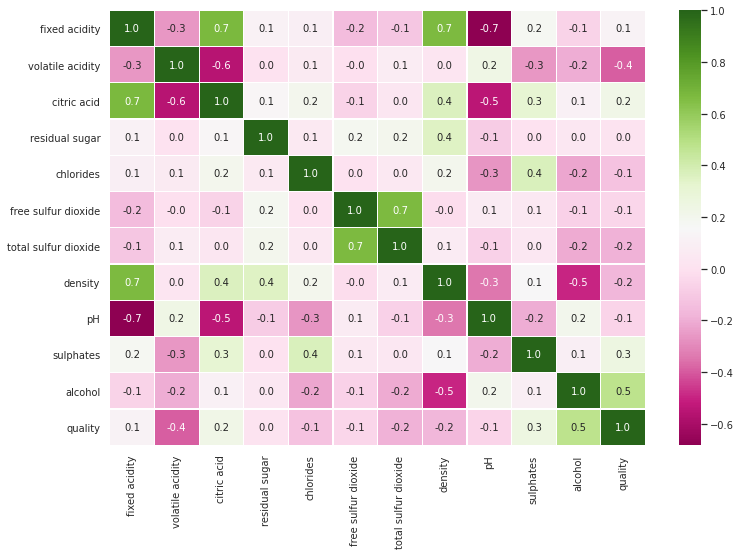

In [152]:
matrix= df_wine.corr()
sns.set(font_scale=0.9)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(matrix, annot=True, annot_kws={'size': 10}, fmt='.1f', cmap='PiYG', linewidths=.2)
plt.show()

Most positively correlated variables include (fixed acidity and citric acid), (fixed acidity and density), (total sulfur dioxide and free sulfur dioxide). Other positively correlated variables include (alcohol and quality).

Most negatively correlated variables include (fixed acidity and pH),(citric acid and volatile acid). Other negatively correlated variables include (pH and citric acid), (alcohol and density).

In [153]:
#set an arbitrary cutoff for your dependent variable (wine quality) 
#at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
df_wine['quality'].replace([0,1,2,3,4,5,6],0,inplace=True)
df_wine['quality'].replace([7,8,9,10],1,inplace=True)

In [154]:
df_wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

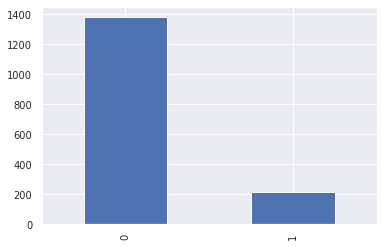

In [155]:
df_wine['quality'].value_counts().plot.bar()

plt.show()

The proportion of wine classed as 'good' is way greater than the proportion of wine classed as 'not good'

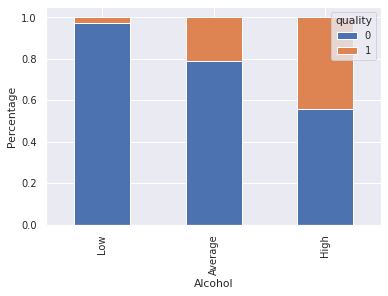

In [156]:
#make bins for the alcohol variable based on the values in it

bins=[0,10,12.5,15]
group=['Low', 'Average', 'High']
df_wine['alcohol_bin']= pd.cut(df_wine['alcohol'], bins, labels=group) #add a column that categorizes the applicant incomes based on the defined bins

alcohol_bin= pd.crosstab(df_wine['alcohol_bin'],df_wine['quality'])
alcohol_bin.div(alcohol_bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

plt.xlabel('Alcohol')
plt.ylabel('Percentage')

plt.show()

The alcohol content affects the quality of the wine. The lesser the alcohol content, the lower the wine quality.

### Outlier Treatment

<AxesSubplot:>

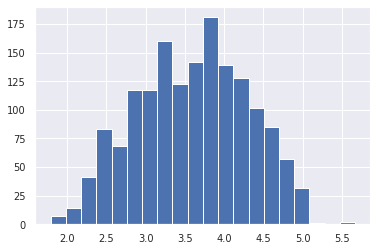

In [157]:
#the total sulfur dioxide distribution is skewed to the right, as the right tail is longer.
#remove the skewness by doing log transformation
#log transformation does not affect smaller values much, but reduced the larger vakues

df_wine['total sulfur dioxide_log']= np.log(df_wine['total sulfur dioxide'])
df_wine['total sulfur dioxide_log'].hist(bins=20)

<AxesSubplot:>

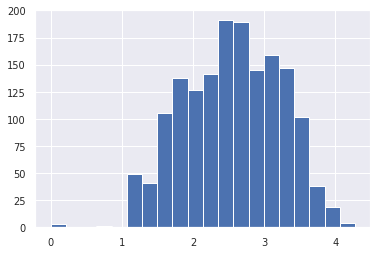

In [158]:
#also do the same for free sulfur dioxide
df_wine['free sulfur dioxide_log']= np.log(df_wine['free sulfur dioxide'])
df_wine['free sulfur dioxide_log'].hist(bins=20)

In [159]:
#drop the variables used to create log variables
df_wine=df_wine.drop(['free sulfur dioxide', 'total sulfur dioxide', 'alcohol_bin'], axis=1)

## Model Development

In [160]:
#place the target data in a separate dataframe
X= df_wine.drop('quality', 1)
y= df_wine[['quality']]

In [161]:
#split the train dataset for prediction and validation 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

print ('Train set:', x_train.shape,  y_train.shape) 
print ('Test set:', x_test.shape,  y_test.shape) 

Train set: (1119, 11) (1119, 1)
Test set: (480, 11) (480, 1)


In [162]:
#import KNN library and accuracy
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score

#start with k=4
k=4
#train the model
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train) 
#predict the model
yhat = neigh.predict(x_test) #reshape the predictions
#Evaluate the accuracy 
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train))) 
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat)) 

Train set Accuracy:  0.8999106344950849
Test set Accuracy:  0.8770833333333333


In [163]:
#Calculate the accuracy for different K from k=1 to say, k=10 
Ks = 10 
mean_acc = np.zeros((Ks-1)) 
std_acc = np.zeros((Ks-1)) 

for n in range(1,Ks): 
    #Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = n)
    neigh.fit(x_train,y_train) 
    yhat=neigh.predict(x_test) 
    yhat=yhat.reshape(480,1)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0]) 
mean_acc
    

array([0.87291667, 0.87916667, 0.8625    , 0.87708333, 0.875     ,
       0.87708333, 0.875     , 0.87291667, 0.87708333])

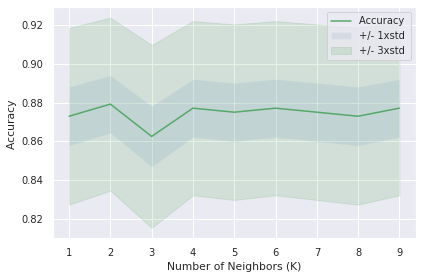

In [164]:
#Plot the accuracy against the K’s 
plt.plot(range(1,Ks),mean_acc,'g') 
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10) 
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green") 
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd')) 
plt.ylabel('Accuracy ') 
plt.xlabel('Number of Neighbors (K)') 
plt.tight_layout() 
plt.show() 

In [165]:
#Print out a statement to show the best K 
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8791666666666667 with k= 2


Lets use k=2 to build a cross validation KNN Model

In [166]:
k=2
#train the model
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train) 
#predict the model
yhat = neigh.predict(x_test) #reshape the predictions
#Evaluate the accuracy 
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train))) 
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat)) 

Train set Accuracy:  0.9329758713136729
Test set Accuracy:  0.8791666666666667
